In [1]:
#from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

import cx_Oracle
import pandas as pd

ModuleNotFoundError: ignored

In [ ]:
!pip install cx_Oracle

In [ ]:
import cx_Oracle
import pandas as pd

In [ ]:
db = cx_Oracle.connect("c##lm","lm",'localhost:1521/xe')
cursor = db.cursor()
cursor.execute("select * from demo") #커서에서는 오라클과 똑같이 대소문자 구분 안 해도 됨
x = cursor.fetchall()
df = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='DEMO'")
col = cursor.fetchall()

list1 = []
for i in col:
    for j in i:
        list1.append(j)
df.columns= list1
df.head()

,고객번호,성별,연령대,거주지역
0,00251,F,60세이상,100
1,00252,F,60세이상,016
2,00253,M,60세이상,100
3,00254,F,60세이상,043
4,00255,F,60세이상,460


In [ ]:
col # 에서 한 번 더 뽑아야 하므로 이중for문 사용

[('고객번호',), ('성별',), ('연령대',), ('거주지역',)]

In [ ]:
# 고객번호, 분기별 구매금액 합계, 고객정보
df_lm = pd.read_csv('df_lm.csv',index_col=0)
df_lm.head()

,고객번호,H1,H2,H3,H4,성별,연령대,거주지역
0,1,19925355,34116312,17898365,13102518,M,60세이상,60.0
1,2,24323230,21922100,27791610,25843820,M,60세이상,100.0
2,3,851215,1042554,592280,679118,M,60세이상,33.0
3,4,5042106,4257510,3656937,3737257,F,60세이상,16.0
4,5,5460150,2225730,2934930,2616260,M,60세이상,100.0


In [ ]:
# H1 대비 H4 간의 구매 감소 고객의 비중을 구하세요.

len(df_lm[df_lm.H4 < df_lm.H1])/len(df_lm)

0.4273332301501316

In [ ]:
# H1 대비 H4 간의 고객별 성장률 컬럼을 추가하세요.

df_lm['성장률']= (df_lm.H4-df_lm.H1)/df_lm.H1
df_lm.head()

,고객번호,H1,H2,H3,H4,성별,연령대,거주지역,cagr,성장률
0,1,19925355,34116312,17898365,13102518,M,60세이상,60.0,-0.099493,-0.342420
1,2,24323230,21922100,27791610,25843820,M,60세이상,100.0,0.015275,0.062516
2,3,851215,1042554,592280,679118,M,60세이상,33.0,-0.054903,-0.202178
3,4,5042106,4257510,3656937,3737257,F,60세이상,16.0,-0.072134,-0.258790
4,5,5460150,2225730,2934930,2616260,M,60세이상,100.0,-0.168008,-0.520845


CAGR(Compound Annual Growth Rate)
- 연복리 성장률을 나타내는 지표
- 주어진 기간 동안의 성장률을 하나의 수치로 요약하여 비교 및 분석에 용이
- 장점은 단순 평균 수익률보다 정확한 성장률을 제공하고, 시간에 따른 변동성을 고려하여 성장률을 측정
- 한계는 특정기간 동안의 평균 성장률을 알려주지만, 성장률의 변동성이나 시계열 데이터의 패턴은 미 반영
- 변동성이나 패턴을 반영하는 지표는 표준편차, 변동계수, 이동평균, 지수 이동평균, 상대강도지수 등이 있음
- CAGR = {(최종 가치 / 초기 가치) ^ (1 / 기간)} - 1

In [ ]:
# cagr 칼럼을 추가하세요
cagr = (df_lm.H4/ df_lm.H1)**(1/4)-1
cagr

df_lm['cagr'] = (df_lm.H4/ df_lm.H1)**(1/4)-1
df_lm.head()
# 단순 성장률과 연복리 성장률은 다르다. 각각의 성장한 것을 평균으로 한 것

# 기준정보

,고객번호,H1,H2,H3,H4,성별,연령대,거주지역,cagr,성장률
0,1,19925355,34116312,17898365,13102518,M,60세이상,60.0,-0.099493,-0.342420
1,2,24323230,21922100,27791610,25843820,M,60세이상,100.0,0.015275,0.062516
2,3,851215,1042554,592280,679118,M,60세이상,33.0,-0.054903,-0.202178
3,4,5042106,4257510,3656937,3737257,F,60세이상,16.0,-0.072134,-0.258790
4,5,5460150,2225730,2934930,2616260,M,60세이상,100.0,-0.168008,-0.520845


In [ ]:
# H1 대비 H4 간의 cagr 기준으로 구매감소 고객의 비중을 구하세요
len(df_lm[df_lm.H4 < df_lm.H1])/len(df_lm)
(df_lm.H4/ df_lm.H1)**(1/4)-1

len(df_lm[df_lm.cagr<0])/len(df_lm)
# => 43% 구매감소, 5.몇 % 구매 증가 신규고객때문에 착시. 기존고객 관리했으면 더 성장했을 수 있다.
# 구매감소 고객의 원인이 뭔가?

0       -0.099493
1        0.015275
2       -0.054903
3       -0.072134
4       -0.168008
           ...   
19378         inf
19379         inf
19380         inf
19381         inf
19382         inf
Length: 19383, dtype: float64

성장률과 연복리성장률은 같지 않은데 구매감소비중은 왜 같은가여
구매감소비중은 같지만 성장율과 연복리성장율은 같지 않다는 게 핵심인가ㅇ요
--> cagr과 성장률에 해당하는 값이 작아서 구매감소비중이 같게 나왔다.
항상 같은 건 아님. 숫자를 변경하면 값이 다를거임~

In [ ]:
# H1 대비 H4 간의 구매 감소 고객의 비중을 구하세요.
len(df_lm[df_lm.H4 <df_lm.H1])/len(df_lm)

0.4273332301501316

In [ ]:
# H1 대비 H4 간의 cagr 기준으로 구매감소 고객의 비중을 구하세요.
len(df_lm[df_lm.cagr<0])/len(df_lm)


# => 약 43% 구매감소, 5.41% 구매 증가 -> 신규고객 때문에 착시.
# 기존고객 관리했으면 더 성장했을 수 있다.
# 구매감소 고객의 원인이 뭔가?

0.4273332301501316

In [ ]:
df_lm['증감'] = df_lm.H4 - df_lm.H1
df_lm.증감.describe()

count    1.938300e+04
mean     1.026025e+06
std      2.116641e+07
min     -1.387164e+09
25%     -9.668465e+05
50%      2.954460e+05
75%      1.875210e+06
max      1.007656e+09
Name: 증감, dtype: float64

In [ ]:
df_lm.cagr.describe()

count    1.937600e+04
mean              inf
std               NaN
min     -1.000000e+00
25%     -5.843754e-02
50%      2.197862e-02
75%      1.144139e-01
max               inf
Name: cagr, dtype: float64

과제2_0512. 과제1에서 작성한 테이블을 주피터로 불러오세요.

In [ ]:
# 2014년 대비 2015년 매출 수익 증감률

db = cx_Oracle.connect("c##lm","lm",'localhost:1521/xe')
cursor = db.cursor()
cursor.execute("select * from G_RATE")
x = cursor.fetchall()
df_g = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='G_RATE'")
col = cursor.fetchall()

list3 = []
for i in col:
    for j in i:
        list3.append(j)
df_g.columns= list3
df_g.head()

,2014구매금액,2015구매금액,증감률(%)
0,329601840581,347417316360,5.41


cx_Oracle.connect("c##hmkd1","hmkd1",'localhost:1521/xe'): cx_Oracle 모듈의 connect() 함수를 사용하여 Oracle 데이터베이스에 연결합니다. 첫 번째 인자는 사용자 이름, 두 번째 인자는 비밀번호, 세 번째 인자는 데이터베이스 서버 이름과 포트번호를 나타냅니다.

db.cursor(): 연결된 데이터베이스에서 쿼리를 실행하기 위한 커서 객체를 생성합니다.

cursor.execute("select * from EMPLOYEES"): 커서 객체를 사용하여 EMPLOYEES 테이블에서 모든 열을 선택하는 SQL 쿼리를 실행합니다.

x = cursor.fetchall(): fetchall() 메서드를 사용하여 결과 집합을 가져와 x 변수에 할당합니다. 이 변수에는 모든 EMPLOYEES 테이블의 데이터가 포함됩니다.

df_e = pd.DataFrame(x): 가져온 데이터를 pandas DataFrame으로 변환합니다.

cursor.execute("select column_name from user_tab_columns where table_name='EMPLOYEES'"): EMPLOYEES 테이블의 열 이름을 가져오기 위한 SQL 쿼리를 실행합니다.

col = cursor.fetchall(): fetchall() 메서드를 사용하여 결과 집합을 가져와 col 변수에 할당합니다. 이 변수에는 EMPLOYEES 테이블의 열 이름이 포함됩니다.


- fetch() 는 SQL 쿼리를 실행한 후, 그 결과로 반환되는 데이터 집합에서 다음 하나의 행(row)을 가져오는 메서드입니다. 반환된 결과는 일반적으로 데이터베이스와의 연결을 통해 Python 프로그램으로 전달됩니다. Python에서 fetch() 메서드는 데이터베이스 연결을 통해 데이터를 가져오는 다양한 방법 중 하나입니다. fetch() 메서드를 사용하면, 데이터베이스에서 일부 또는 전체 데이터를 읽어서 Python에서 활용할 수 있습니다.



In [ ]:
# 반기별 매출 수익 파악

db = cx_Oracle.connect("c##lm","lm",'localhost:1521/xe')
cursor = db.cursor()
cursor.execute("select * from h_revenue")
x = cursor.fetchall()
df_hr = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='H_REVENUE'")
col = cursor.fetchall()

list2 = []
for i in col:
    for j in i:
        list2.append(j)
df_hr.columns= list2
df_hr.head()


,제휴사,반기별매출,YEAR,HYEAR
0,2014,20141H,A,118614767910
1,2014,20141H,B,28011051473
2,2014,20141H,C,11505871747
3,2014,20141H,D,109039010
4,2014,20142H,A,130492942290


In [ ]:
# 반기&연령대 별 구매건수 및 구매금액 확인

db = cx_Oracle.connect("c##lm","lm",'localhost:1521/xe')
cursor = db.cursor()
cursor.execute("select * from HAP")
x = cursor.fetchall()
df_hap = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='HAP'")
col = cursor.fetchall()

list5 = []
for i in col:
    for j in i:
        list5.append(j)
df_hap.columns= list5
df_hap.head()

,HYEAR,연령대,구매건수,총구매금액
0,20141H,19세이하,4938,31425436
1,20141H,20세~24세,49034,660826948
2,20141H,25세~29세,160907,3462742892
3,20141H,30세~34세,510639,11901612482
4,20141H,35세~39세,1002495,24004259119


In [ ]:
# 2014년 대비 2015년 구매 감소한 대분류코드 구하기 (총 48개)
db = cx_Oracle.connect("c##lm","lm",'localhost:1521/xe')
cursor = db.cursor()
cursor.execute("select * from DEC15")
x = cursor.fetchall()
df_dc15 = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='DEC15'")
col = cursor.fetchall()

list10 = []
for i in col:
    for j in i:
        list10.append(j)
df_dc15.columns= list10
df_dc15.head()

,대분류코드
0,6
1,10
2,11
3,12
4,14


In [ ]:
# 2014년 대비 2015년 구매 감소한 카테고리들의 2015년 총 매출의 비중
db = cx_Oracle.connect("c##lm","lm",'localhost:1521/xe')
cursor = db.cursor()
cursor.execute("select * from DECPUR15")
x = cursor.fetchall()
df_dp15 = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='DECPUR15'")
col = cursor.fetchall()

list9 = []
for i in col:
    for j in i:
        list9.append(j)
df_dp15.columns= list9
df_dp15.head(11)
#상위 10개 이후로는 다 0%임

,대분류코드,2014 구매금액,2015 구매금액,2015 총 구매금액 대비 감소율,2015 전체 총 구매금액 대비 비율
0,6,24923259117,23561017088,0.95,0.07
1,14,3662292500,2969495230,0.81,0.01
2,52,1917890833,1862708400,0.97,0.01
3,17,2409474371,2279921400,0.95,0.01
4,29,1951592450,1758099960,0.90,0.01
5,10,2958258753,2950920982,1.00,0.01
6,12,5037478023,2353972397,0.47,0.01
7,11,2559618892,2364667350,0.92,0.01
8,43,2018160505,1836377050,0.91,0.01
9,15,4046973807,3774555275,0.93,0.01


과제3_0512. employees 테이블을 불러와서 다음사항을 수행하세요.
- 컬럼명을 포함하여 employees 테이블을 데이터프레임으로 출력
- department_id별 평균 연봉을 출력
- 부서별 평균 연봉을 수평 그래프로 시각화

In [ ]:
# 컬럼명을 포함하여 employees 테이블을 데이터프레임으로 출력

db = cx_Oracle.connect("c##hmkd1","hmkd1",'localhost:1521/xe')
cursor = db.cursor()
cursor.execute("select * from EMPLOYEES")
x = cursor.fetchall()
df_e = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='EMPLOYEES'")
col = cursor.fetchall()

list4 = []
for i in col:
    for j in i:
        list4.append(j)
df_e.columns= list4
df_e.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.0,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.0,NaN,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.0,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.0,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.0,NaN,103.0,60.0


In [ ]:
# department_id별 평균 연봉을 출력

s_mean = df_e.groupby('DEPARTMENT_ID')['SALARY'].mean()
dfs_mean = pd.DataFrame(s_mean).reset_index()
dfs_mean

,DEPARTMENT_ID,SALARY
0,10.0,4400.000000
1,20.0,9500.000000
2,30.0,4150.000000
3,40.0,6500.000000
4,50.0,3475.555556
5,60.0,5760.000000
6,70.0,10000.000000
7,80.0,8955.882353
8,90.0,19333.333333
9,100.0,8601.333333


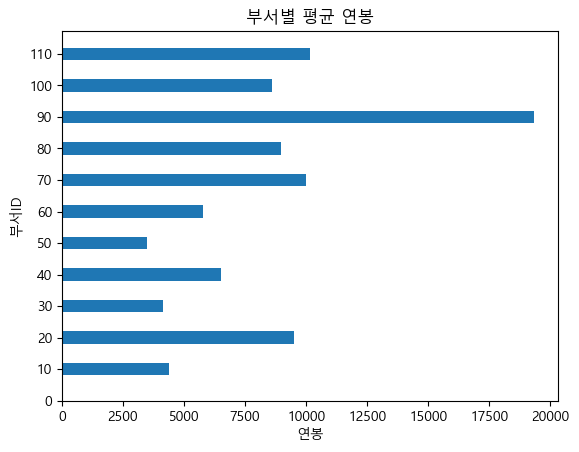

In [ ]:
# 부서별 평균 연봉을 수평 그래프로 시각화

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

plt.barh(dfs_mean['DEPARTMENT_ID'],dfs_mean['SALARY'], height=4.0)

plt.xlabel('연봉')
plt.ylabel('부서ID')
plt.title('부서별 평균 연봉')
plt.yticks(range(0,120,10))

plt.show()

과제4_0512. 과제2에서 불러온 데이터프레임을 통계적 시각적으로 탐색하여 인사이트를 도출하세요.